# Trabajo práctico integrador - Análisis de datos
## Carrera de Especialización En Inteligencia Artificial - Cohorte 17
### Autores:
* Horn, Martin
* Lloveras, Alejandro
* Méndez, Diego Martín
* Micozzi, María Luz

El dataset contiene más de 30000 registros de canciones de Spotify de 6 categorias (EDM, Latin, Pop, R&B, Rap y Rock) tomados por medio de la API de Spotify.
El dataset cuenta con información actualizada a fines del 2023.

Nos centraremos en el campo track_popularity y buscaremos su relación con otros campos que describen las características musicales como: key, tempo, danceability, energy, etc.; o el género/subgénero y año de lanzamiento.

### Campos:

| Variable                  | Descripción                                                                                                                                                                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track_id`                | ID único de la canción                                                                                                                                                                                                                          |
| `track_name`              | Nombre de la canción                                                                                                                                                                                                                             |
| `track_artist`            | Artista de la canción                                                                                                                                                                                                                            |
| `track_popularity`        | Popularidad de la canción (0-100), donde un valor más alto indica una mayor popularidad                                                                                                                                                         |
| `track_album_id`          | ID único del álbum                                                                                                                                                                                                                               |
| `track_album_name`        | Nombre del álbum de la canción                                                                                                                                                                                                                  |
| `track_album_release_date`| Fecha de lanzamiento del álbum                                                                                                                                                                                                                   |
| `playlist_name`           | Nombre de la lista de reproducción                                                                                                                                                                                                              |
| `playlist_id`             | ID de la lista de reproducción                                                                                                                                                                                                                   |
| `playlist_genre`          | Género de la lista de reproducción                                                                                                                                                                                                               |
| `playlist_subgenre`       | Subgénero de la lista de reproducción                                                                                                                                                                                                            |
| `danceability`            | La danceabilidad describe qué tan adecuada es una pista para bailar, basándose en una combinación de elementos musicales. Un valor de 0.0 es menos danceable y 1.0 es más danceable.                                                            |
| `energy`                  | La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Típicamente, las pistas energéticas se sienten rápidas y ruidosas.                                                                 |
| `key`                     | La tonalidad general estimada de la pista. Los enteros se asignan a notas utilizando la notación estándar de Clase de Tonos. Ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta tonalidad, el valor es -1.                          |
| `loudness`                | La sonoridad general de una pista en decibelios (dB). Los valores típicos oscilan entre -60 y 0 dB.                                                                                     |
| `mode`                    | El modo indica la modalidad (mayor o menor) de una pista. Mayor está representado por 1 y menor por 0.                                                                                  |
| `speechiness`             | La presencia de palabras habladas en una pista. Los valores por encima de 0.66 describen pistas que probablemente están hechas completamente de palabras habladas.                                                                           |
| `acousticness`            | Una medida de confianza de 0.0 a 1.0 sobre si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.                                                     |
| `instrumentalness`        | Predice si una pista no contiene voces. Valores por encima de 0.5 están destinados a representar pistas instrumentales.                                                                  |
| `liveness`                | Detecta la presencia de una audiencia en la grabación. Un valor superior a 0.8 proporciona una alta probabilidad de que la pista sea en vivo.                                          |
| `valence`                 | Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas). |
| `tempo`                   | El tempo estimado general de una pista en beats por minuto (BPM).                                                                                                                      |
| `duration_ms`             | Duración de la canción en milisegundos                                                                                                                                                                                                          |


In [917]:
#LIMITES
# danceability: > 0.5 -> bailable
# speechiness: > 0.66 -> speech
# acousticness: > 0.5 -> acoustic 
# intstrumentalness: > 0.5 -> intstrumental 
# liveness: > 0.8 -> live 
# valence: 1 = positiva / 0 = negativa

In [837]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Exploración y Comprensión de los Datos

In [895]:
# leer CSV
df = pd.read_csv('spotify_songs.csv')

In [839]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [840]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [841]:
df.head(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [842]:
df.tail(5)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.603,0.884,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500


In [843]:
# Speechiness
max_speechiness = df['speechiness'].max()

# Obtenemos las canciones con el valor maximo de 'speechiness'
tracks_with_max_speechiness = df[df['speechiness'] == max_speechiness]

tracks_with_max_speechiness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
25705,5ZbJR1AfdOsvsYNuCvgqKX,I'M DEAD,Duckwrth,59,1JqHKxNhfBv3ZIz1VwhENp,I'M UUGLY,2016-09-23,Groovy // Funky // Neo-Soul,0JmBB9HfrzDiZoPVRdv8ns,r&b,neo soul,0.593,0.751,4,-9.414,0,0.918,0.707,0.0,0.356,0.485,114.907,230632


In [844]:
# Acousticness
min_acousticness = df['acousticness'].min()

# Obtenemos las canciones con el valor maximo de 'acousticness'
tracks_with_min_acousticness = df[df['acousticness'] == min_acousticness]

tracks_with_min_acousticness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11363,51w6nRCU68klqNfYaaVP2j,"Hi, How're You Doin'?",DREAMS COME TRUE,0,4wdK52JVu5GzhxW3RCZ3AV,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,album rock,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


In [845]:
# Instrumentalness
min_instrumentalness = df['instrumentalness'].min()

# Obtenemos las canciones con el valor maximo de 'instrumentalness'
tracks_with_min_instrumentalness = df[df['instrumentalness'] == min_instrumentalness]

tracks_with_min_instrumentalness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.10200,0.0,0.0653,0.518,122.036,194754
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.08030,0.0,0.0833,0.725,123.976,189052
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.1270,0.07990,0.0,0.1430,0.585,124.982,163049
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.18700,0.0,0.1760,0.152,112.648,187675
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.642,0.818,2,-4.552,1,0.0320,0.05670,0.0,0.0919,0.590,124.957,253040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32802,3Gwq0zKnMWluOEPKh93BeC,Lost At Sea,Zedd,51,7juWTdmjo0vYywWu8HiQxs,Clarity,2012-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.567,0.796,6,-3.534,1,0.0364,0.02470,0.0,0.1240,0.305,127.983,225840
32811,353JGhRW6ahVU3DpCxOjqW,Utopia - Radio Edit,Qubicon,11,466ziBbv68mP56uJom8uSL,Utopia,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.490,0.866,7,-3.152,1,0.0406,0.01820,0.0,0.1060,0.185,127.998,219844
32813,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,Borgeous,0,3NArAQULJ5BMoR8YY5UdWA,Invincible,2014-02-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.613,0.775,6,-4.040,0,0.0409,0.00678,0.0,0.0677,0.391,127.906,204609
32827,0aBDrRTgDCwWbcOnEIp7DJ,Many Ways - Radio Edit,Ferry Corsten feat. Jenny Wahlstrom,27,59XOfNjuYZB6feC6QUzS3e,Many Ways,2013,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.581,0.640,5,-8.367,1,0.0365,0.02660,0.0,0.5720,0.288,128.001,196993


In [846]:
# Liveness
max_liveness = df['liveness'].max()

# Obtenemos las canciones con el valor maximo de 'liveness'
tracks_with_max_liveness = df[df['liveness'] == max_liveness]

tracks_with_max_liveness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11296,2da7wnI5OoV89TsdKMM81k,Knockin' On Heaven's Door - Live In London / 1992,Guns N' Roses,50,3ZwjaVcnVo2TwhK8N8WWVs,Live Era '87-'93,1999-01-01,This Is Guns N' Roses,37i9dQZF1DX74DnfGTwugU,rock,album rock,0.271,0.891,6,-6.011,1,0.0824,0.00188,0.0157,0.996,0.365,147.509,447160


In [847]:
# Valence
max_valence = df['valence'].min()

# Obtenemos las canciones con el valor maximo de 'valence'
tracks_with_max_valence = df[df['valence'] == max_valence]

tracks_with_max_valence

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11363,51w6nRCU68klqNfYaaVP2j,"Hi, How're You Doin'?",DREAMS COME TRUE,0,4wdK52JVu5GzhxW3RCZ3AV,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,album rock,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


## Técnicas de Visualización

In [848]:
"""
sns.pairplot(df)
plt.show()
"""

'\nsns.pairplot(df)\nplt.show()\n'

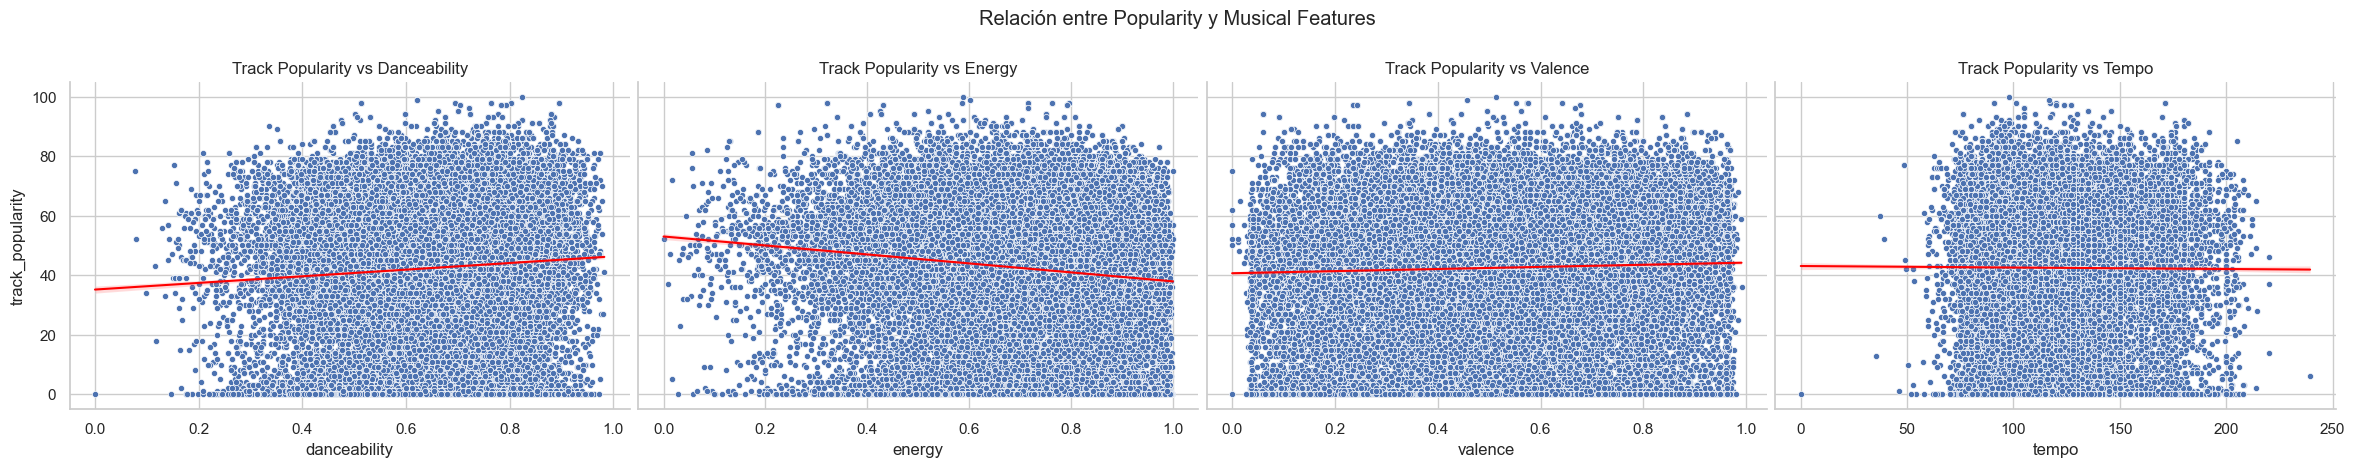

In [849]:
pp = sns.pairplot(df,
                 x_vars=['danceability', 'energy', 'valence', 'tempo'],
                 y_vars='track_popularity',
                 height=4,
                 aspect=1.5,  # Aspect ratio para agrandar los gráficos
                 kind='scatter',  # Scatter plot
                 plot_kws={'s': 20, 'edgecolor': 'w', 'linewidth': 0.5}
)

# Agregamos líneas de regresión
for ax in pp.axes.flat:
    sns.regplot(
        x=ax.collections[0].get_offsets()[:, 0],
        y=ax.collections[0].get_offsets()[:, 1],
        ax=ax,
        scatter=False,
        color='red',
        line_kws={'linewidth': 1.5}
    )

# Leyenda
for ax, feature in zip(pp.axes.flat, ['Danceability', 'Energy', 'Valence', 'Tempo']):
    ax.set_title(f'Track Popularity vs {feature}')
plt.suptitle('Relación entre Popularity y Musical Features', y=1.15)

plt.show()

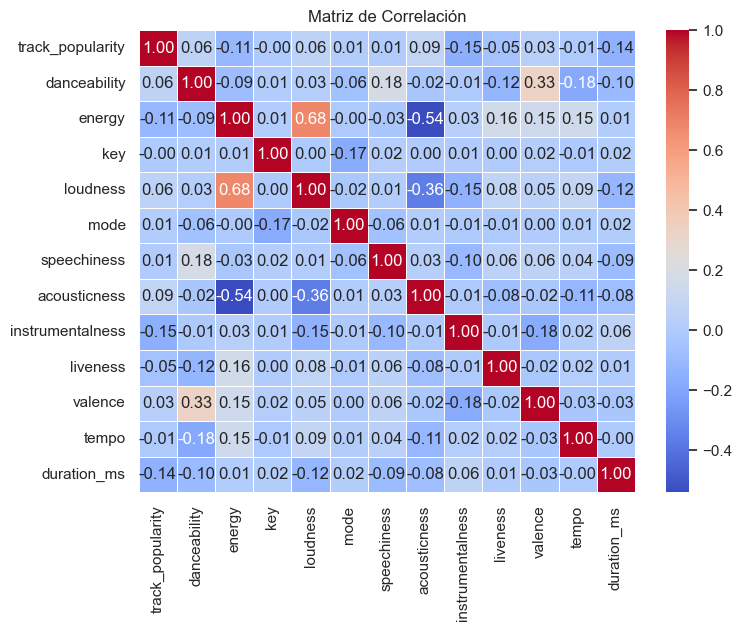

In [850]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Original

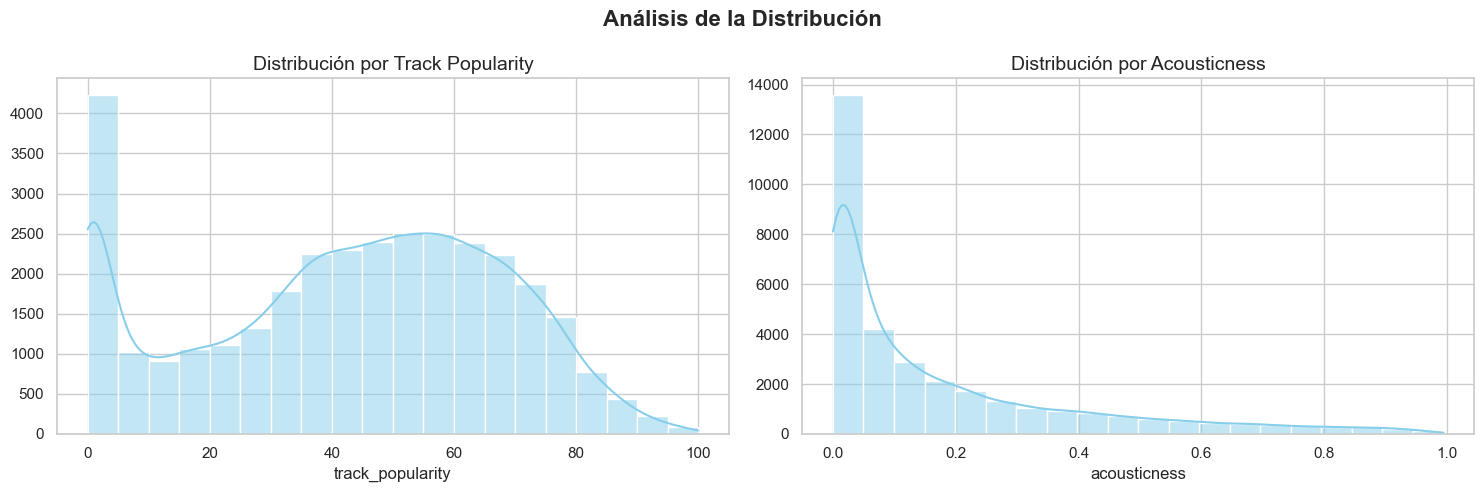

In [851]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.set(style="whitegrid")
plt.title('Variables con igual rango (0 a 1)', fontsize=14)

# Graficamos la distribución del campo track_popularity
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title('Distribución por Track Popularity', fontsize=14)
axes[0].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='acousticness', bins=20, kde=True, color="skyblue", ax=axes[1])
axes[1].set_title('Distribución por Acousticness', fontsize=14)
axes[1].set_ylabel('')

plt.suptitle('Análisis de la Distribución', fontsize=16, fontweight='bold')
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

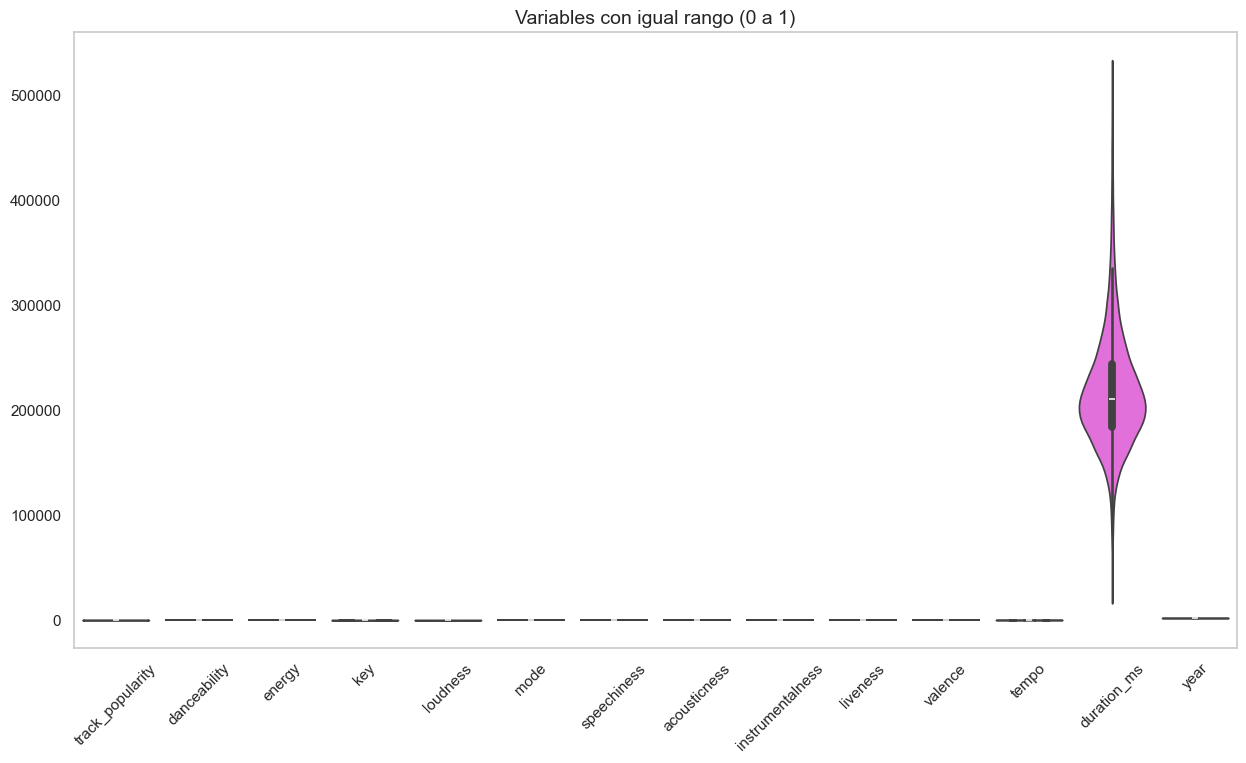

In [997]:
# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot(data=df)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Decidimos separar las variables 'duration_ms', 'tempo' y 'track_popularity' en violin plot diferentes por tener un rango diferente que impide la visualización.

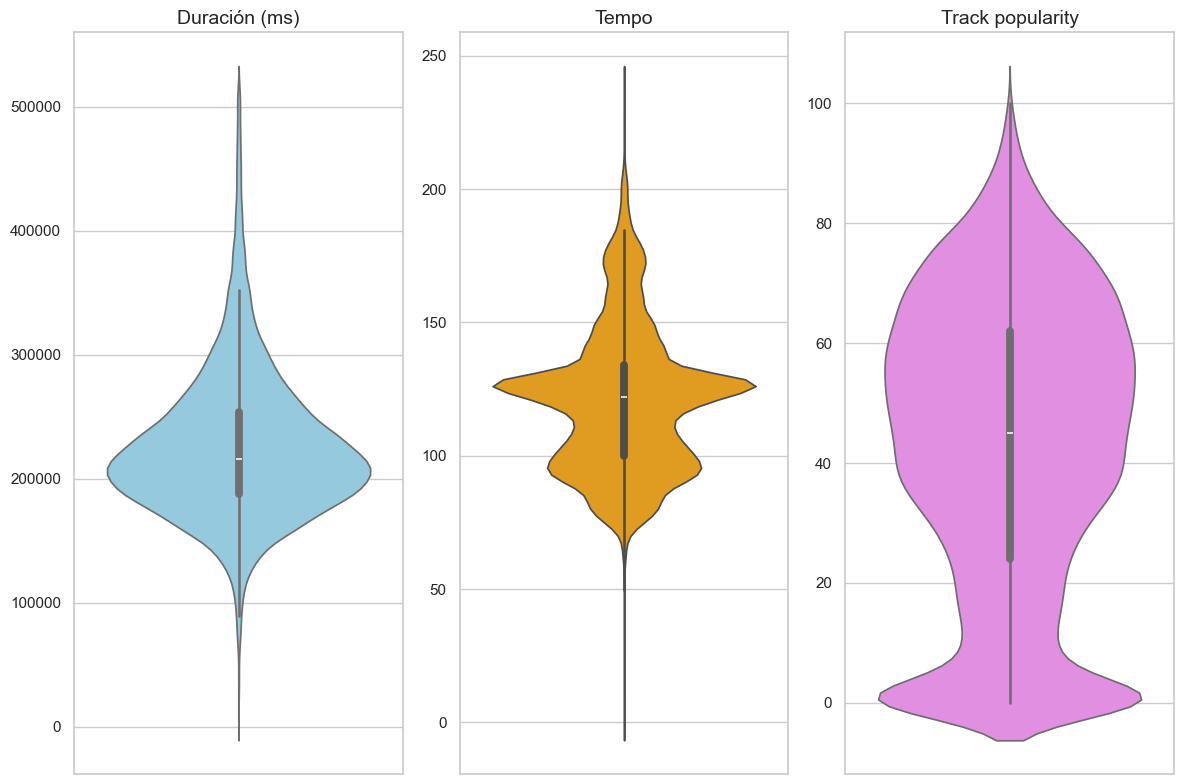

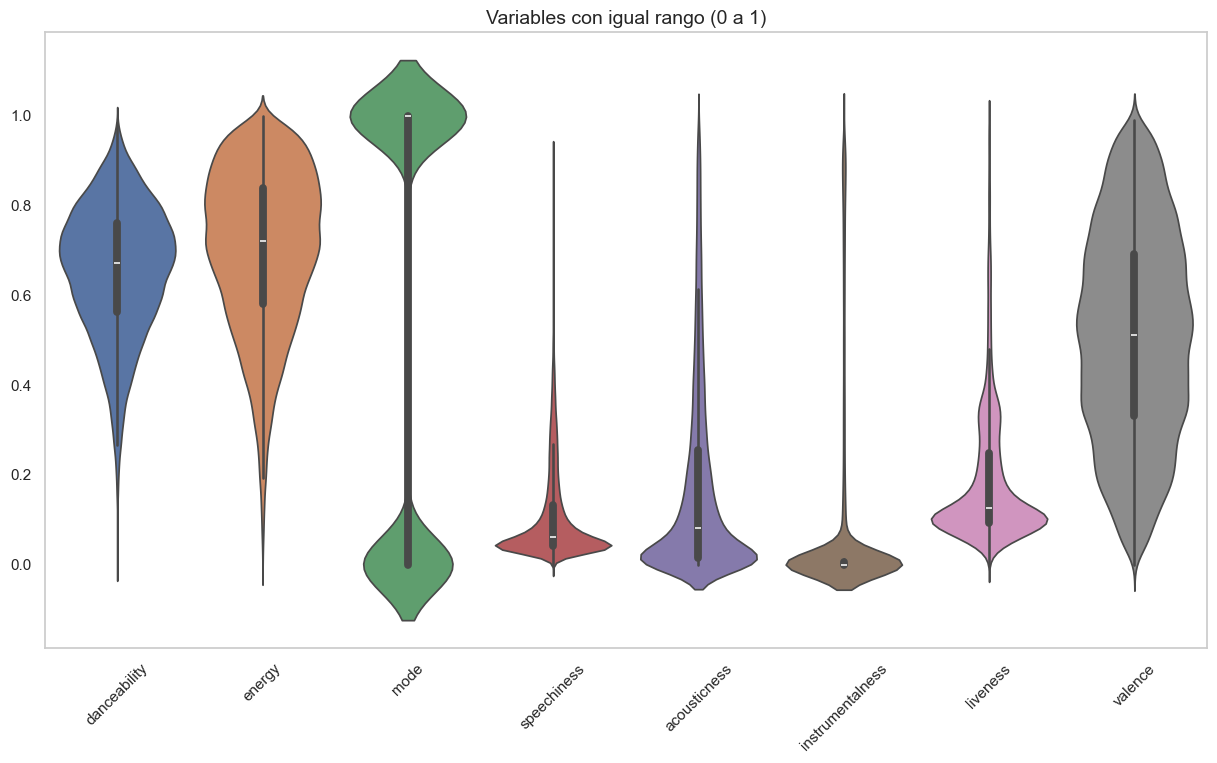

In [852]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

# Primer subplot (fila 0, columna 0)
sns.violinplot(ax=axes[0], data=df['duration_ms'], color='skyblue')
axes[0].set_title('Duración (ms)', fontsize=14)
axes[0].set_ylabel('')

# Segundo subplot (fila 0, columna 1)
sns.violinplot(ax=axes[1], data=df['tempo'], color='orange')
axes[1].set_title('Tempo', fontsize=14)
axes[1].set_ylabel('')

# Tercer subplot (fila 1, columna 0)
sns.violinplot(ax=axes[2], data=df['track_popularity'], color='violet')
axes[2].set_title('Track popularity', fontsize=14)
axes[2].set_ylabel('')
# Ajustar el layout para que los subplots no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot( data=df.drop(['duration_ms','tempo','track_popularity','loudness','key'],axis=1))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

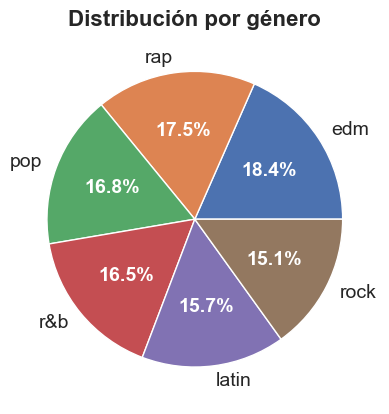

In [853]:
# Estudiamos la distrubición por género
sample = df.groupby('playlist_genre').agg({'track_id': 'count'}).rename(columns={'track_id': 'track_count'}).sort_values(by='track_count', ascending=False)
track_counts = sample['track_count']

wedges, texts, autotexts = plt.pie(
    track_counts,
    labels=sample.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14}  # Aumenta el tamaño del texto
)

# Aplicar estilos a los porcentajes (autotexts)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribución por género', fontsize=16, fontweight='bold')
plt.show()

In [854]:
genres = sample.index.to_list()

In [856]:
subgenres = sample.index.to_list()

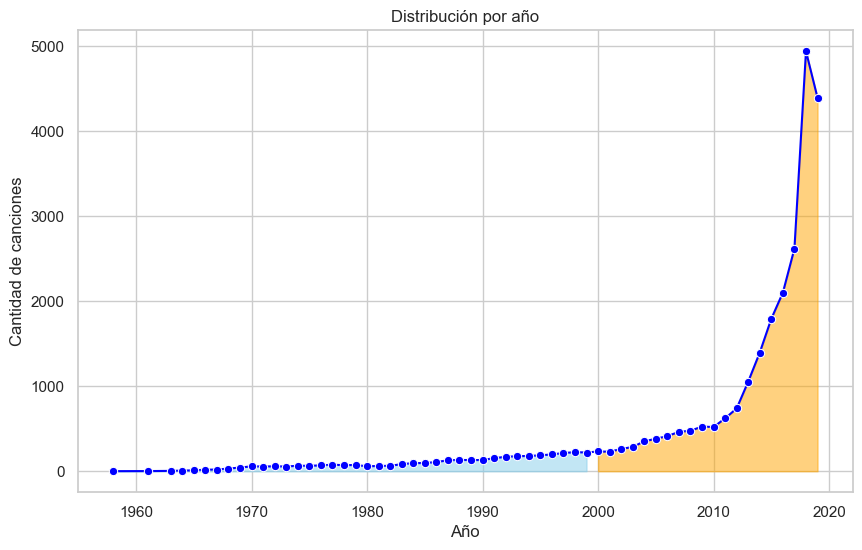

In [857]:
# Estudiamos la distribución de canciones por año
df['year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

yearly_tracks = df['year'].value_counts().sort_index()
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

# Plotting the smoothed trend with annotations and color coding
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Distribución por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.grid(True)

max_year = yearly_tracks.idxmax()
max_value = yearly_tracks.max()
plt.annotate(f'Maximum in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value + 500),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2000, color='skyblue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2000, color='orange', alpha=0.5)

plt.show()

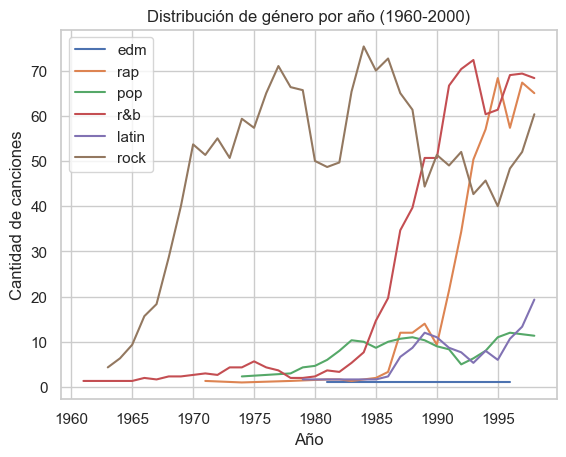

In [858]:
#Distribución de género por año
df_yr = df[df['year'] < 2000]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.title('Distribución de género por año (1960-2000)')
#plt.yscale('log')
plt.legend()
plt.show()

### EXTRA ###

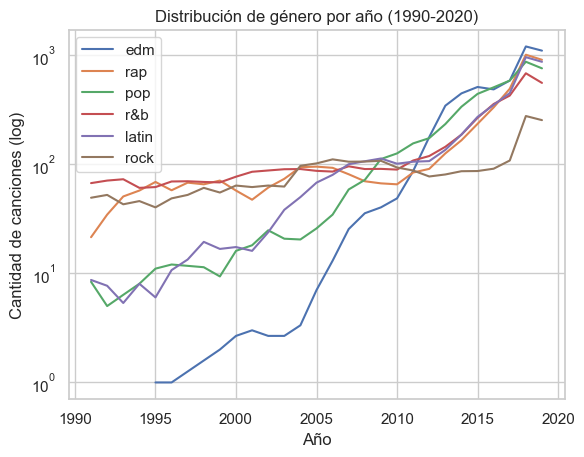

In [859]:
#Distribución de género por año
df_yr = df[df['year'] >= 1990]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones (log)')
plt.title('Distribución de género por año (1990-2020)')
plt.yscale('log')
plt.legend()
plt.show()

### EXTRA ###

## Limpieza del Dataset

### Identificación de valores nulos

In [860]:
# vemos la cantidad de valores nulos por cada campo
df.isnull().sum()

track_id               0
track_name             5
track_artist           5
track_popularity       0
track_album_id         0
                    ... 
liveness               0
valence                0
tempo                  0
duration_ms            0
year                1886
Length: 24, dtype: int64

In [861]:
# filtramos para ver los registros con valores nulos
null_data = df[df.isnull().any(axis=1)]
null_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
151,2QtJA4gbwe1AcanB2p21aP,Stay The Night - Featuring Hayley Williams Of ...,Zedd,61,4xak0izXQHOMV9Wu1mDAAy,Clarity (Deluxe),2012,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,0.596,0.738,8,-3.109,1,0.0411,0.10900,0.000000,0.0947,0.461,127.961,217347,NaN
749,77j9HOrxUpWcjwra9jgvio,We like to Party! (Six Flags),Vengaboys,51,0R44mmTKUE1XCuGVVrPfTZ,We like to Party! (The Vengabus),1998,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.785,0.905,8,-7.929,1,0.0449,0.00803,0.859000,0.0460,0.969,136.018,224227,NaN
750,6rQ9qJPvInEqSzlh89LsPJ,Coco Jamboo - Radio Version,Mr. President,18,2t8Bc4qBseswbwOoHGHK8d,We See The Same Sun,1996,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.832,0.838,1,-5.414,0,0.0421,0.07910,0.000000,0.1520,0.965,100.019,218733,NaN
751,5FgtdSf7I5lClThz2ptWvl,Blue (Da Ba Dee),Eiffel 65,16,65DySolRDG1LNSvRXcWQWN,Europop,1999,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.822,0.969,7,-11.471,0,0.0582,0.25900,0.000162,0.3900,0.765,128.007,283748,NaN
753,2ahnofp2LbBWDXcJbMaSTu,What Is Love,Haddaway,70,0qTVjeVP70YvQG4GctetOf,What is Love - Remix,1993,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.683,0.772,7,-7.907,0,0.0311,0.02220,0.014900,0.2030,0.737,123.871,270373,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32360,0363w3IUcO4cJMsAFLpfLY,Faith - Radio Edit,Blasterjaxx,0,1IZUFYTXNbjkzgawT7cFpM,Faith,2013,Gym (Melbourne Bounce/Progressive House),5BqOZpVEqRDfZScvW1QUyA,edm,progressive electro house,0.672,0.692,9,-6.566,0,0.0486,0.00636,0.002310,0.1870,0.670,128.009,183067,NaN
32767,1h7LBCgfnSUEe7qXRbwMIp,Push Play,Zedd,39,4xak0izXQHOMV9Wu1mDAAy,Clarity (Deluxe),2012,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.604,0.921,9,-1.440,1,0.0459,0.08680,0.000000,0.0841,0.252,130.030,219360,NaN
32774,1NtVWYw9QDr30Ei0phACni,Lessons In Love (feat. Neon Trees),Kaskade,23,7r47EiktL01BmvI7NHdgcA,Fire & Ice,2011,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.585,0.814,7,-4.335,1,0.0540,0.02650,0.000013,0.1330,0.597,127.989,247693,NaN
32775,454ZIylnCq09ONjQE4EJ6a,Turn It Down (with Rebecca & Fiona) - Radio Edit,Kaskade,13,0xiigD6kCGMSv9CcSpJFUr,"I Love You, Man (Bonus Track Version)",2011,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.509,0.669,5,-7.922,0,0.0455,0.05360,0.008350,0.3390,0.413,126.971,238360,NaN


In [862]:
# filtramos los campos donde track_popularity es 0 
df_filtered = df[df['track_popularity'] == 0]
df_filtered

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
476,1gsb4CFzUMERAkfzAKwrZu,Siren,SUNMI,0,75eIP5pPvtQCB0bAz2TEsU,WARNING,2018-09-26,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,pop,dance pop,0.605,0.894,9,-3.885,0,0.0385,0.011900,0.000000,0.0887,0.545,122.051,197252,2018.0
772,4yEXem27DzCg8xytvvO3E9,Lollipop (Candyman),Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,2009-01-01,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.716,0.981,0,-3.612,0,0.0310,0.031700,0.007400,0.1710,0.861,139.047,215053,2009.0
801,7vHkU1H73z5NVbGTIyI1DG,Around The World,Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,2009-01-01,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,dance pop,0.705,0.975,6,-3.847,1,0.0312,0.003320,0.000182,0.5370,0.969,129.934,209120,2009.0
883,3decfgk2pFkvCzYUFj6ssf,I'm Yours,Influencers Worship,0,2FQCn5R6hSDeGYgUCW5kN9,I'm Yours,2018-07-06,Christian Dance Party,37i9dQZF1DWUUPO0Sbx2CM,pop,dance pop,0.559,0.844,11,-6.397,0,0.0557,0.000186,0.000994,0.1690,0.357,127.995,205280,2018.0
934,5KHbu2Go6NBryS0h0TpTNJ,Talk About It,Bancali,0,5aBI1WNIur9niQ5dM6xnVB,Talk About It,2018-01-17,Pop Dance Hits,7eERKCkgNKCCx5GYdeMIZf,pop,dance pop,0.498,0.723,7,-6.740,0,0.2230,0.508000,0.000521,0.4190,0.318,110.024,248727,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32800,5yl2YyDgcpERTZoZHD9Etl,Dynamite,Gareth Emery,0,3Zm13AWIMBpJbwFzenqy9V,Drive,2014-04-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.576,0.693,5,-6.113,1,0.0312,0.011100,0.656000,0.0991,0.314,127.986,292284,2014.0
32810,0ZAPuWOQiiY0nGbLPlozT8,Lights & Thunder - Club Mix,Gareth Emery,0,6yHi6saMH67HPD59a6arK1,Lights & Thunder,2014-03-31,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.599,0.894,5,-4.654,0,0.0430,0.001980,0.019700,0.5340,0.171,128.004,313877,2014.0
32813,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,Borgeous,0,3NArAQULJ5BMoR8YY5UdWA,Invincible,2014-02-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.613,0.775,6,-4.040,0,0.0409,0.006780,0.000000,0.0677,0.391,127.906,204609,2014.0
32821,3fgNmvYq0QU5aFHDUMa4cm,Unleash (Life In Color Anthem 2014) - Original...,Adventure Club,0,4qzYTF7mwcWMbEFdw5qcHB,Unleash,2014-04-16,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.701,0.607,1,-4.514,0,0.0547,0.004440,0.000041,0.0433,0.342,127.979,331000,2014.0


### Tratamiento de duplicados

In [863]:
# Búsqueda de duplicados
duplicate_counts = df['track_id'].value_counts()[df['track_id'].value_counts() > 1]
print(duplicate_counts)

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
3eekarcy7kvN4yt5ZFzltW     9
14sOS5L36385FJ3OL8hew4     9
7LzouaWGFCy4tkXDOOnEyM     8
2b8fOow8UzyDFAE27YhOZM     8
                          ..
6wVViUl2xSRoDK2T7dMZbR     2
3W6WaJa1wRQfbhqotaHtyM     2
7hDVN6GisA47ym0H93NA1Z     2
3F8aTQzmKovktFcR7MCGFW     2
6Nabz5Gsy80XL0MJoOmgF8     2
Name: count, Length: 3166, dtype: int64


In [864]:
# Eliminación de duplicados
df = df.drop_duplicates(subset='track_id', keep='first')

In [865]:
# Verificación
duplicate_counts = df['track_id'].value_counts()[df['track_id'].value_counts() > 1]
print(duplicate_counts)

Series([], Name: count, dtype: int64)


### Tratamiento de outliers

#### Variable track_popularity

In [866]:
# Verificamos la cantidad de canciones con track_popularity igual a 0
unpopular_counts = df['track_popularity'] == 0
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 28356, dtype: bool


2620

Identificamos que la presencia de gran cantidad de canciones con valor 0 de 'track_popularity'. Luego de explorar el dataset pensamos que puede deverse a que esas canciones no han recibido suficientes escuchas para establecer su popularidad, lo cual puede deberse a factores externos (ej. falta de promoción, artista desconocido) que exceden la información del presente dataset, en particular a las variables musicales con las que se intenta verificar si existe una correlación.

In [867]:
# Eliminamos las canciones con track_popularity igual a 0
#df_subset = df[(df['track_popularity'] < 30) & (df['track_popularity'] > 5)]
df_subset = df[df['track_popularity'] > 10]

### EXTRA ###

In [868]:
# Verificamos la eliminación de canciones con track_popularity igual a 0
unpopular_counts = df_subset['track_popularity'] == 0
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 23196, dtype: bool


0

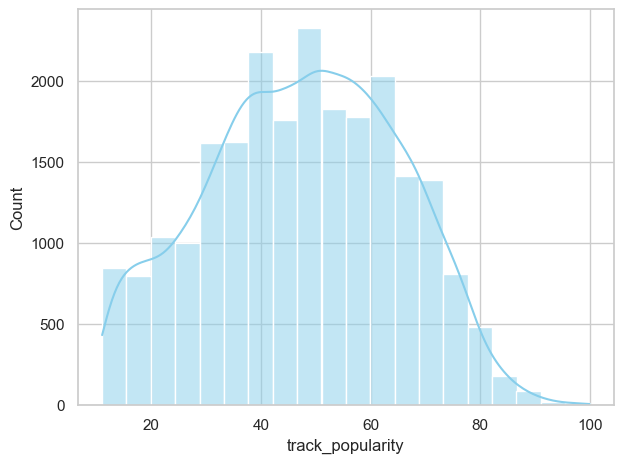

In [869]:
# Graficamos la distribución del campo track_popularity
sns.histplot(data=df_subset, x='track_popularity', bins=20, kde=True, color="skyblue")
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

### EXTRA ###

In [870]:
df = df_subset

#### Variable tempo

In [901]:
# Verificamos la cantidad de canciones con tempo igual a 0
zerotempo_counts = df['tempo'] < 30
print(zerotempo_counts)
zerotempo_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: tempo, Length: 32833, dtype: bool


1

In [872]:
# Eliminamos las canciones con tempo igual a 0
df =  df[df['tempo'] > 0]

In [873]:
# Verificamos la eliminación de canciones con tempo igual a 0
zerotempo_counts = df['tempo'] == 0
print(zerotempo_counts)
zerotempo_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: tempo, Length: 23196, dtype: bool


0

#### Variable duracion_ms

In [874]:
# Verificamos la cantidad de canciones con duración menor a 30 seg
zeroduration_counts = df['duration_ms'] < 30000
print(zeroduration_counts)
zeroduration_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: duration_ms, Length: 23196, dtype: bool


0

In [875]:
# Eliminamos las canciones con duración menor a 30 seg
df = df[df['duration_ms'] >= 30000]

In [876]:
# Verificamos la eliminación de canciones con duración menor a 30 seg
zeroduration_counts = df['duration_ms'] < 30000
print(zeroduration_counts)
zeroduration_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: duration_ms, Length: 23196, dtype: bool


0

#### Variable loudness

In [877]:
# Verificamos la cantidad de canciones con loudness menor a -30 dB
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
low_loudness_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23196, dtype: bool


5

In [878]:
# Eliminamos las canciones con loudness menor a -30 dB
df = df[df['loudness'] > -30]

In [879]:
# Verificamos la eliminacion de las canciones con loudness menor a -30 dB
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
low_loudness_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23191, dtype: bool


0

In [880]:
df_bu = df

## Tests filtrando dataset

In [978]:
df = df_bu

In [979]:
# Eliminamos las canciones anteriores a 2010
df = df[df['year'] >= 1990]

### EXTRA ###

In [980]:
# Filtrando por género
#df = df[df['playlist_genre'] == 'edm']
#df = df[df['playlist_genre'] == 'rap']
#df = df[df['playlist_genre'] == 'pop']
#df = df[df['playlist_genre'] == 'r&b']
#df = df[df['playlist_genre'] == 'latin']
#df = df[df['playlist_genre'] == 'rock']

In [981]:
#LIMITES
# danceability: > 0.5 -> bailable
# speechiness: > 0.66 -> speech
# acousticness: > 0.5 -> acoustic 
# intstrumentalness: > 0.5 -> intstrumental 
# liveness: > 0.8 -> live 
# valence: 1 = positiva / 0 = negativa

"""
df.loc[:, 'danceability'] = df['danceability'] > 0.5
df.loc[:, 'speechiness'] = df['speechiness'] > 0.66
df.loc[:, 'acousticness'] = df['acousticness'] > 0.5
df.loc[:, 'instrumentalness'] = df['instrumentalness'] > 0.5  # Corregido el nombre de la columna
df.loc[:, 'liveness'] = df['liveness'] > 0.8
df.loc[:, 'valence'] = df['valence'] > 0.5
"""

"\ndf.loc[:, 'danceability'] = df['danceability'] > 0.5\ndf.loc[:, 'speechiness'] = df['speechiness'] > 0.66\ndf.loc[:, 'acousticness'] = df['acousticness'] > 0.5\ndf.loc[:, 'instrumentalness'] = df['instrumentalness'] > 0.5  # Corregido el nombre de la columna\ndf.loc[:, 'liveness'] = df['liveness'] > 0.8\ndf.loc[:, 'valence'] = df['valence'] > 0.5\n"

## Transformación de Variables y Selección de Features

In [982]:
# Escalado loudness
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[['track_popularity','loudness','tempo','duration_ms','year']] = scaler.fit_transform(df[['track_popularity','loudness','tempo','duration_ms','year']])
df_scaled.describe()

### EXTRA ###

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,20689.000000,20689.000000,20689.000000,20689.000000,20689.000000,20689.000000,20689.00000,20689.000000,20689.000000,20689.000000,20689.000000,20689.000000,20689.000000,20689.000000
mean,0.409877,0.662215,0.694449,5.353280,0.763399,0.553628,0.11219,0.183464,0.090253,0.188679,0.497192,0.462514,0.384717,0.814230
std,0.197400,0.142486,0.182440,3.616814,0.094223,0.497128,0.10427,0.226978,0.233666,0.152111,0.230690,0.146656,0.116097,0.228451
min,0.000000,0.077100,0.008140,0.000000,0.000000,0.000000,0.02240,0.000001,0.000000,0.009360,0.000010,0.000000,0.000000,0.000000
25%,0.269663,0.572000,0.578000,2.000000,0.717521,0.000000,0.04240,0.015800,0.000000,0.093700,0.318000,0.348905,0.313055,0.766667
50%,0.415730,0.679000,0.717000,6.000000,0.779490,1.000000,0.06610,0.085300,0.000013,0.126000,0.497000,0.468207,0.368129,0.900000
75%,0.561798,0.765000,0.837000,8.000000,0.828407,1.000000,0.14300,0.271000,0.004730,0.242000,0.677000,0.533985,0.437649,0.966667
max,1.000000,0.983000,1.000000,11.000000,1.000000,1.000000,0.91800,0.992000,0.994000,0.996000,0.991000,1.000000,1.000000,1.000000


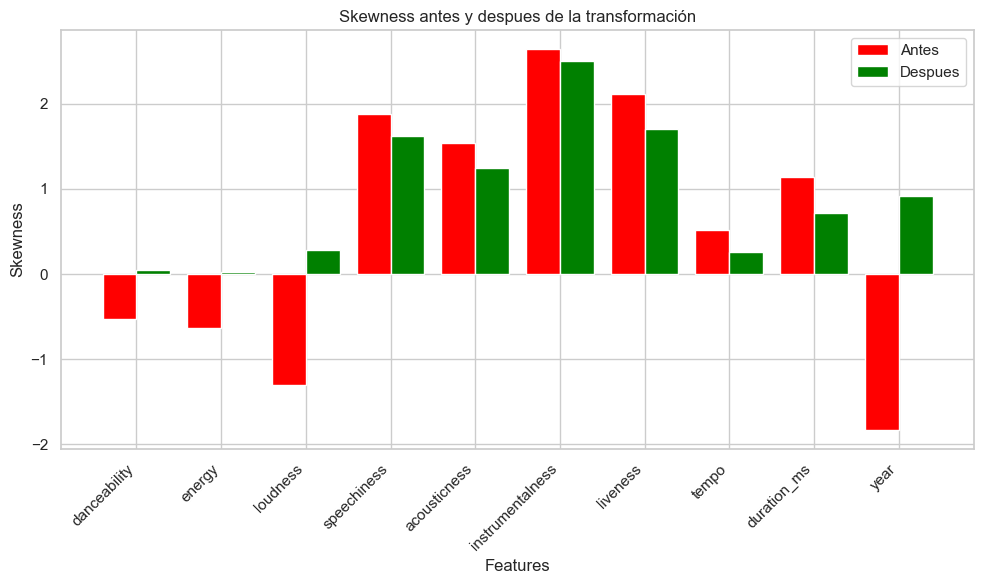

In [983]:
skew_df = pd.DataFrame(columns=['feature', 'before', 'after', 'transformer'])


def remove_skewness(feature, df_scaled):
    
    skew = df_scaled[feature].skew()
    output = df_scaled[feature]
    row = [feature, skew, 0, 'None'] 
    transformers = [np.log1p, np.sqrt] if skew > 0 else [np.square, np.exp, lambda x: x**3]

    
    for transformer in transformers:
        sample = transformer(df_scaled[feature] + 1) if transformer == np.sqrt else transformer(df_scaled[feature])
        if abs(sample.skew()) < abs(skew):
            skew = abs(sample.skew())
            output = sample
            row[2] = skew  
            row[3] = transformer._name_ if hasattr(transformer, '_name_') else str(transformer)

    skew_df.loc[len(skew_df)] = row
    return output

categorical_feat = []
numerical_feat = []
#Separamos nuestro dataset entre variables numericas y categoricas
for col in df_scaled.columns:
  if df[col].dtype == 'object':
    categorical_feat.append(col)
  else:
    numerical_feat.append(col)
  

skewed_features = [feat for feat in numerical_feat if abs(df_scaled[feat].skew()) >= 0.5]
#Aplicamos el skew solo a las variables numericas
for feat in skewed_features:
  df_scaled[feat] = remove_skewness(feat, df_scaled)


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = range(len(skew_df))
bars_before = ax.bar(index, skew_df['before'], bar_width, label='Antes', color='red')
bars_after = ax.bar([i + bar_width for i in index], skew_df['after'], bar_width, label='Despues', color='green')
ax.set_xlabel('Features')
ax.set_ylabel('Skewness')
ax.set_title('Skewness antes y despues de la transformación')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(skew_df['feature'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

In [984]:
df_scaled['key'] = df_scaled['key'].astype(int)

# Realizar el one-hot encoding para la variable key
one_hot_encoded = pd.get_dummies(df_scaled['key'], prefix='key')

# Creamos un nuevo DataFrame one-hot encoded para key
df_key = pd.concat([df_scaled, one_hot_encoded], axis=1)

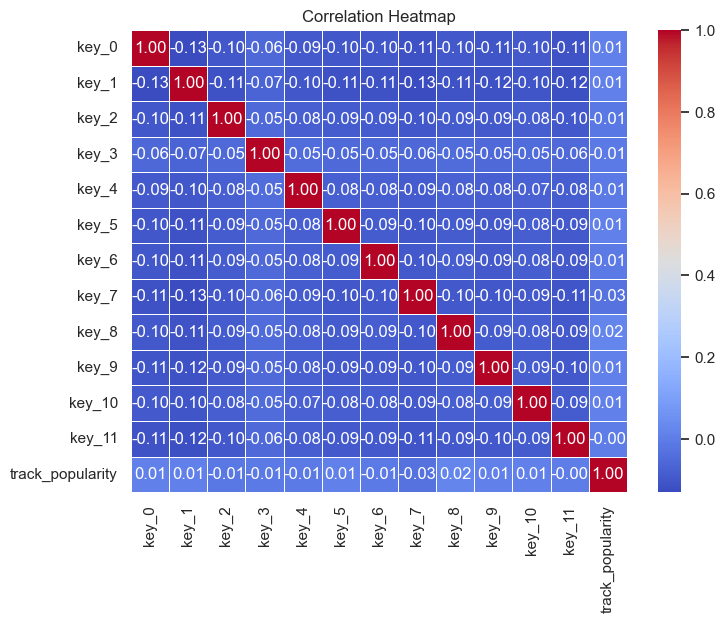

In [985]:
subset = []
subset = df_key[[col for col in df_key.columns if col.startswith('key_')] + ['track_popularity']]

# Calculate the correlation matrix
corr_matrix = subset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Dado que la tonalidad key no tiene correlación con track_popularity será desestimada.

In [986]:
df_scaled.drop(columns=['key'], inplace=True)

In [987]:
# Aplicar One Hot Encoding a la variable playlist_genre
df_scaled = pd.get_dummies(df_scaled, columns=['playlist_genre'], prefix='genre')

### EXTRA ###

In [988]:
# Eliminando las canciones con tempo más bajo por encontrarse desbalanceadas
df_scaled = df_scaled[df_scaled['tempo'] >= 0.2]

### EXTRA ###

In [989]:
"""
sns.pairplot(df_scaled)
plt.show()
"""

'\nsns.pairplot(df_scaled)\nplt.show()\n'

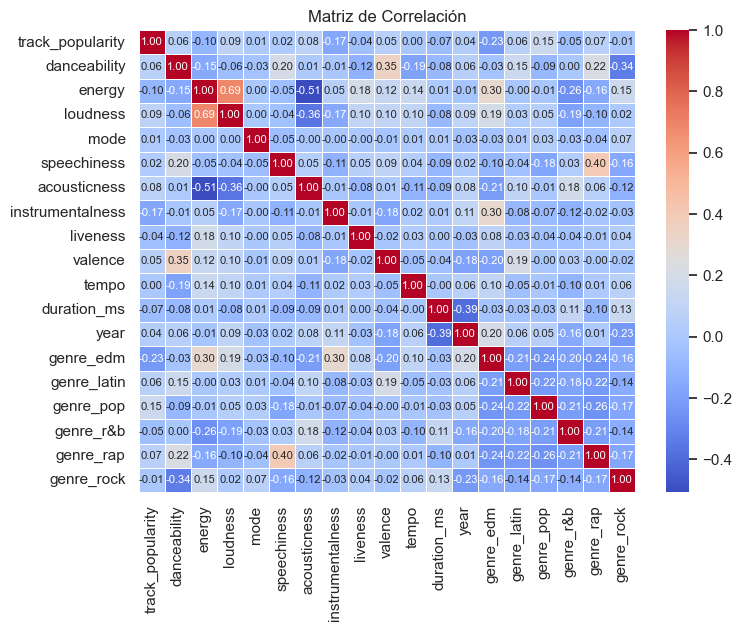

In [990]:
# Seleccionar solo columnas numéricas
numeric_df = df_scaled.select_dtypes(include=['number', 'bool'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

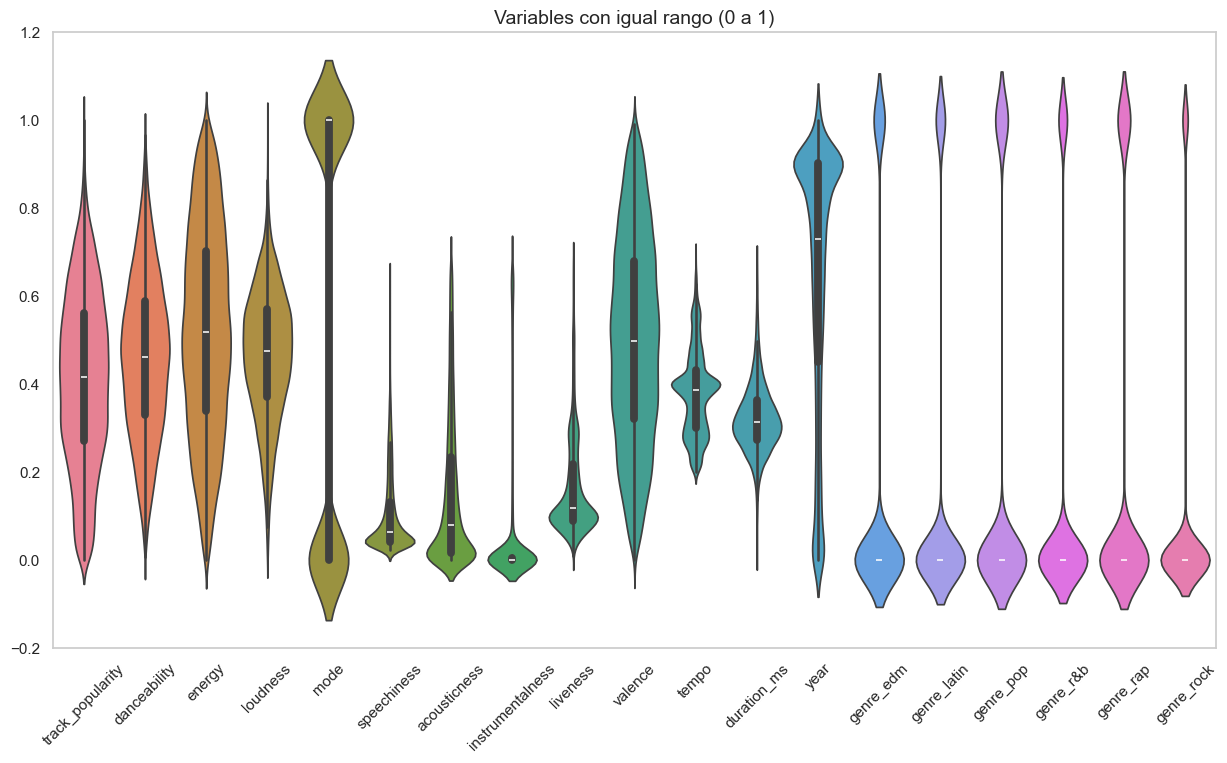

In [996]:
# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot(data=df_scaled)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

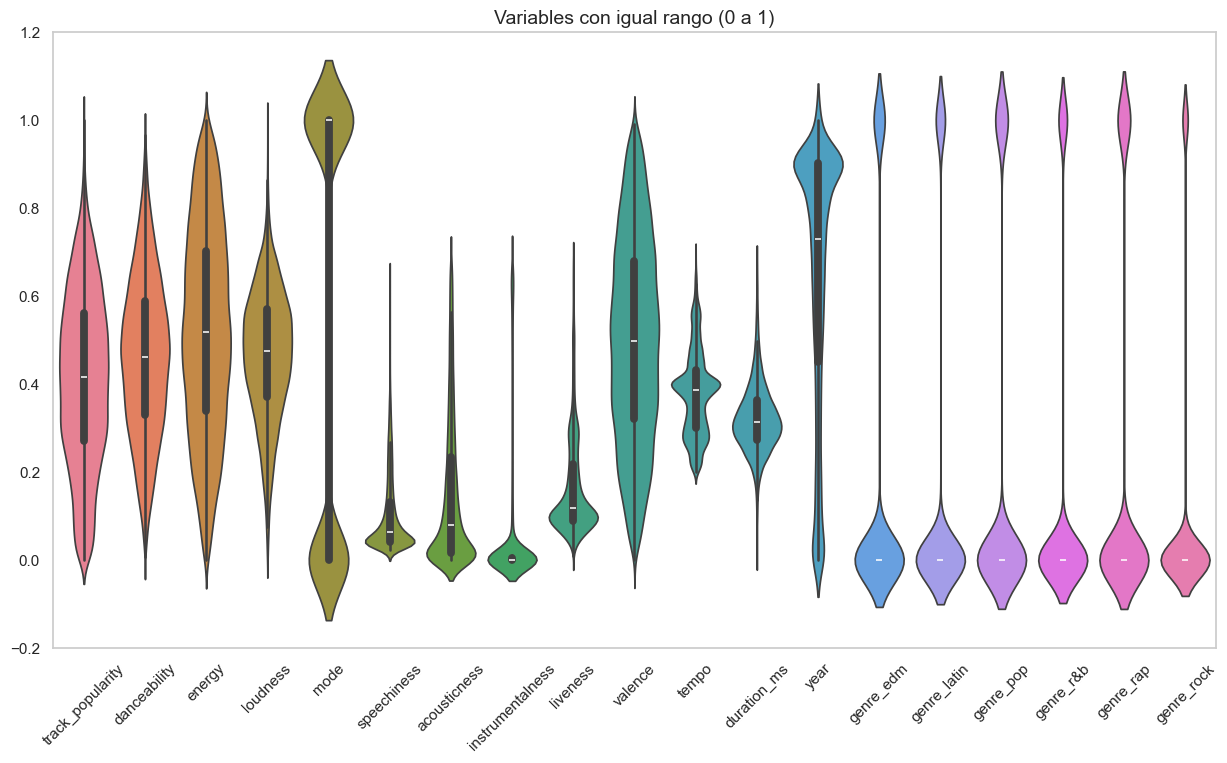

In [ ]:
# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot(data=df_scaled)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Reducción de la Dimensionalidad